
# Testing multilabel predictions using example data

Begin by reading in the example data from the example code directory. The example data contains no missing data and should be easy to read in and process.

In [66]:
import pandas as pd
train_phenotypes = pd.read_csv("example_data\example_train_phenotypes.csv", index_col=[0])
train_genotypes = pd.read_csv("example_data\example_train_genotypes.csv", index_col=[0])
test_phenotypes = pd.read_csv("example_data\example_test_phenotypes.csv", index_col=[0])
test_genotypes = pd.read_csv("example_data\example_test_genotypes.csv", index_col=[0])

In [67]:
train_genotypes.head()

,Chromosome_5243_A,Chromosome_5247_T,Chromosome_5248_T,Chromosome_5250_G,Chromosome_5251_A,Chromosome_5254_G,Chromosome_5260_A,Chromosome_5261_A,Chromosome_5265_G,Chromosome_5266_C,...,Chromosome_4408186_T,Chromosome_4408186_A,Chromosome_4408186_C,Chromosome_4408187_C,Chromosome_4408191_C,Chromosome_4408192_T,Chromosome_4408196_A,Chromosome_4408197_T,Chromosome_4408198_C,Chromosome_4408198_A
X,,,,,,,,,,,,,,,,,,,,,
Sample1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Sample2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Sample3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Sample4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Sample5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [68]:
train_phenotypes.head()

,rifampicin,isoniazid,ethambutol,pyrazinamide
X,,,,
Sample1,1,1,1,0
Sample2,1,1,0,0
Sample3,1,1,1,1
Sample4,1,1,1,1
Sample5,0,0,0,0



The data is loaded and ready to start the machine learning process. The first step is to address any potential class imbalances. As label powerset addresses multilabel classification by converting it to a multiclass problem, it is possible to perform upsampling to address imbalances in the dataset. This has already been addressed and implemented for multiclass problems.

It is useful to first observe the class imbalances across the training dataset.


<AxesSubplot: >

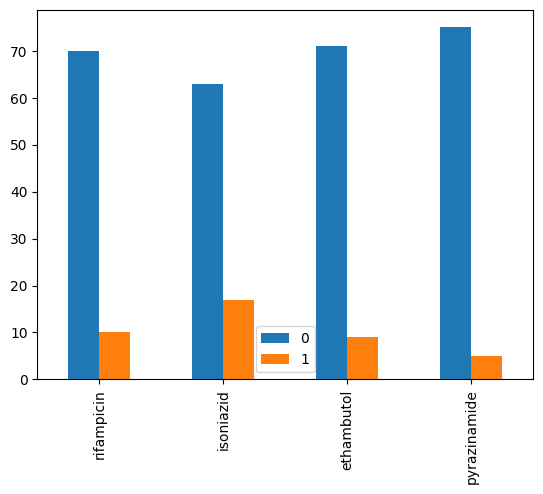

In [69]:
train_phenotypes.apply(pd.value_counts).T.plot.bar() # plot number of each class


The next step is to transform the data to mutliclass and perform oversampling.

[0 1 2 2 3 0 3 3 3 3 3 3 3 3 3 3 3 3 3 0 3 0 0 4 2 5 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 4 3 3 3 3 4 3 3 3 3 3 3 3 4 3 3 3 3 3 4 3 3 3 3 3 3 6 3 3 4 3 3 3 3
 3 3 3 3 3 3]


<AxesSubplot: >

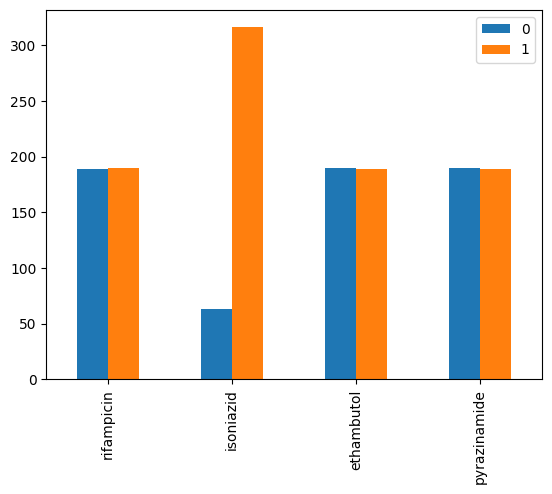

In [70]:
from skmultilearn.problem_transform import LabelPowerset
from imblearn.over_sampling import RandomOverSampler
import numpy as np
lp = LabelPowerset()
y = np.array(train_phenotypes) # convert data frame to numpy array for transformation
x = np.array(train_genotypes) # convert data frame to numpy array for transformation
y = lp.transform(y)
print(y) # visualise transformation
ros = RandomOverSampler(random_state=10, sampling_strategy='not minority') # check sampling strategy
x_resampled, y_resampled = ros.fit_resample(x, y)
y_resampled = lp.inverse_transform(y_resampled)
y_resampled_full = y_resampled.toarray()
y_resampled_full = pd.DataFrame(y_resampled_full, columns= train_phenotypes.columns)
y_resampled_full.apply(pd.value_counts).T.plot.bar() # plot number of each class